INFO:root:Using 1 workers


tensor(0.0008) STD
tensor(91.0855) STD
tensor(0.0008) STD
tensor(91.0855) STD
tensor(-2.2313)
tensor(8.6758)
channel 0 max tensor(3.7193)
channel 0 min tensor(-2.2313)
channel 0 mean tensor(6.6374e-09)
channel 0 std tensor(1.0000)
channel 1 max tensor(8.6758)
channel 1 min tensor(-0.7823)
channel 1 mean tensor(3.6565e-09)
channel 1 std tensor(1.0000)


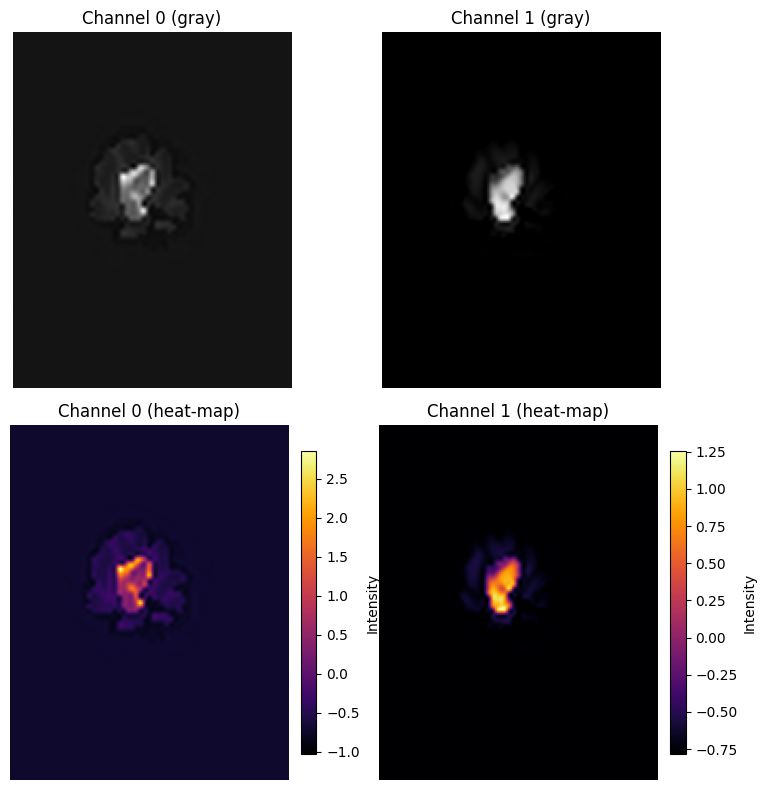

In [ ]:
#!/usr/bin/env python3
import matplotlib.pyplot as plt
from asparagus.modules.data_modules.training import SegDataModule
from asparagus.modules.transforms.normalize import Torch_Normalize
from batchgenerators.utilities.file_and_folder_operations import load_json
from torchvision import transforms
from yucca.functional.array_operations.matrix_ops import get_max_rotated_size

patch_size = [160, 160, 160]
p_rot_all_channel = 0.2
p_scale_all_channel = 0.2

if p_rot_all_channel > 0 or p_scale_all_channel > 0:
    pre_aug_patch_size = get_max_rotated_size(patch_size)
else:
    pre_aug_patch_size = patch_size

cpu_transforms = transforms.Compose(
    [
        Torch_Normalize(normalize=True),
        # Torch_Clamp(clamp=True, lower_percentile=0, upper_percentile=0.95),
        # Torch_CropPad(patch_size=pre_aug_patch_size, p_oversample_foreground=0.4, pad_value="replicate"),
        # Torch_Spatial(
        #    patch_size=patch_size,
        #    p_deform_all_channel=0.0,
        #    p_rot_all_channel=p_rot_all_channel,
        #    p_rot_per_axis=0.3,
        #    p_scale_all_channel=p_scale_all_channel,
        #    clip_to_input_range=False,
        #    skip_label=False,
        # ),
    ]
)

splits = load_json("/dtu/p1/asbmun/data/asparagus/data/Task601_SEG_ISLES22_ADCDWI/split_40_10_50.json")[1]


data_module = SegDataModule(
    train_split=[splits["train"][0]],
    val_split=splits["val"],
    train_transforms=cpu_transforms,
    val_transforms=None,
    batch_size=1,
    num_workers=1,
)

data_module.setup(stage="fit")

batch = next(iter(data_module.train_dataloader()))
img = batch["image"][0]

print(img.min())
print(img.max())

mid = 1
slice_img = img[:, mid].cpu()


# ---------------------------------------------------------------------------
# 1. --- Make a 2×N grid instead of 1×N
fig, axs = plt.subplots(2, slice_img.shape[0], figsize=(4 * slice_img.shape[0], 8))
if slice_img.shape[0] == 1:  # keep indexing consistent
    axs = axs.reshape(2, 1)

for c in range(slice_img.shape[0]):
    print(f"channel {c} max", img[c].max())
    print(f"channel {c} min", img[c].min())
    print(f"channel {c} mean", img[c].mean())
    print(f"channel {c} std", img[c].std())

    img_c = slice_img[c]

    # ---------- grayscale (row-0) ----------
    ax_g = axs[0, c]
    ax_g.imshow(img_c, cmap="gray")
    ax_g.set_title(f"Channel {c} (gray)")
    ax_g.axis("off")

    # ---------- heat-map (row-1) ----------
    ch_min, ch_max = img_c.min().item(), img_c.max().item()  # individual scale
    ax_h = axs[1, c]
    im = ax_h.imshow(img_c, cmap="inferno", vmin=ch_min, vmax=ch_max)
    ax_h.set_title(f"Channel {c} (heat-map)")
    ax_h.axis("off")
    cbar = fig.colorbar(im, ax=ax_h, fraction=0.046, pad=0.04)
    cbar.set_label("Intensity")

plt.tight_layout()
plt.show()

In [ ]:
print(img.shape)
print(mid)

img[0, 0, 0, 0]

torch.Size([2, 146, 166, 130])
1


tensor(-0.7221)

In [17]:
!pwd

/zhome/d7/a/208602/asparagus/asparagus/notebooks
